In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [931]:
x = np.random.randint(1, 6, 100).reshape([100, 1])

In [932]:
y = (10 + 0.5 * x[:, 0]).reshape([100, 1])

In [933]:
x = np.insert(x, 0, 1, axis=1)

In [1021]:
class LinReg(object):
    
    def __init__(self, iterations=1000, learning_rate=0.01):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.x = None
        self.y = None
        self.w = None
        self.costs = []
        
    def cost(self):
        return np.sum((self.x @ self.w - self.y) ** 2)
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.w = np.empty((self.x.shape[1], 1))
        for _ in range(self.iterations):
            updated_w = np.ones_like(self.w)
            for i, param in enumerate(self.w):
                updated_w[i] = param - self.learning_rate * 1/len(self.x) * (self.x @ self.w - self.y).T @ self.x[:, i]
            self.w = updated_w
            if _ % (self.iterations / 10) == 0:
                self.costs.append(self.cost())
                
    def plot_costs(self):
        plt.plot(self.costs)

In [1022]:
mod = LinReg(iterations=1000, learning_rate=0.1)

In [1023]:
mod.fit(x, y)

In [1024]:
mod.w

array([[10. ],
       [ 0.5]])

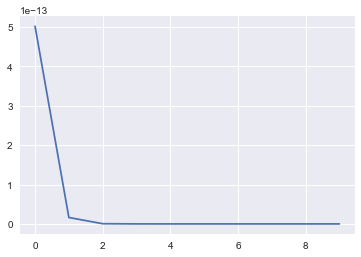

In [1025]:
mod.plot_costs()